In [7]:
import numpy as np
import random

np.random.seed(42)
dates = pd.date_range(start='2025-04-01', end='2025-04-30', freq='D')
locations = ['Branch A', 'Branch B', 'Branch C']
meal_types = ['Breakfast', 'Lunch', 'Dinner']
payment_methods = ['Cash', 'Credit Card', 'UPI', 'Online Wallet']

data = []

for date in dates:
    for location in locations:
        for meal in meal_types:
            num_customers = np.random.randint(10, 100)
            avg_order = round(np.random.uniform(100, 500), 2)
            discount = round(np.random.choice([0, 5, 10, 15]), 2)
            total_sales = round(num_customers * avg_order * (1 - discount/100), 2)
            payment = random.choice(payment_methods)

            data.append({
                'Date': date,
                'Day_of_Week': date.strftime('%A'),
                'Location': location,
                'Meal_Type': meal,
                'Number_of_Customers': num_customers,
                'Average_Order_Value': avg_order,
                'Discount_Applied (%)': discount,
                'Total_Sales': total_sales,
                'Payment_Method': payment
            })

df = pd.DataFrame(data)
df.head()


,Date,Day_of_Week,Location,Meal_Type,Number_of_Customers,Average_Order_Value,Discount_Applied (%),Total_Sales,Payment_Method
0,2025-04-01,Tuesday,Branch A,Breakfast,61,480.29,10,26367.92,Credit Card
1,2025-04-01,Tuesday,Branch A,Lunch,81,339.46,10,24746.63,Online Wallet
2,2025-04-01,Tuesday,Branch A,Dinner,92,139.99,10,11591.17,UPI
3,2025-04-01,Tuesday,Branch B,Breakfast,97,233.48,15,19250.43,Credit Card
4,2025-04-01,Tuesday,Branch B,Lunch,33,360.36,0,11891.88,UPI


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(df.info())
print(df.describe())
print(df['Location'].value_counts())
print(df['Meal_Type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  270 non-null    datetime64[ns]
 1   Day_of_Week           270 non-null    object        
 2   Location              270 non-null    object        
 3   Meal_Type             270 non-null    object        
 4   Number_of_Customers   270 non-null    int64         
 5   Average_Order_Value   270 non-null    float64       
 6   Discount_Applied (%)  270 non-null    int32         
 7   Total_Sales           270 non-null    float64       
 8   Payment_Method        270 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 18.1+ KB
None
                      Date  Number_of_Customers  Average_Order_Value  \
count                  270           270.000000           270.000000   
mean   2025-04-15

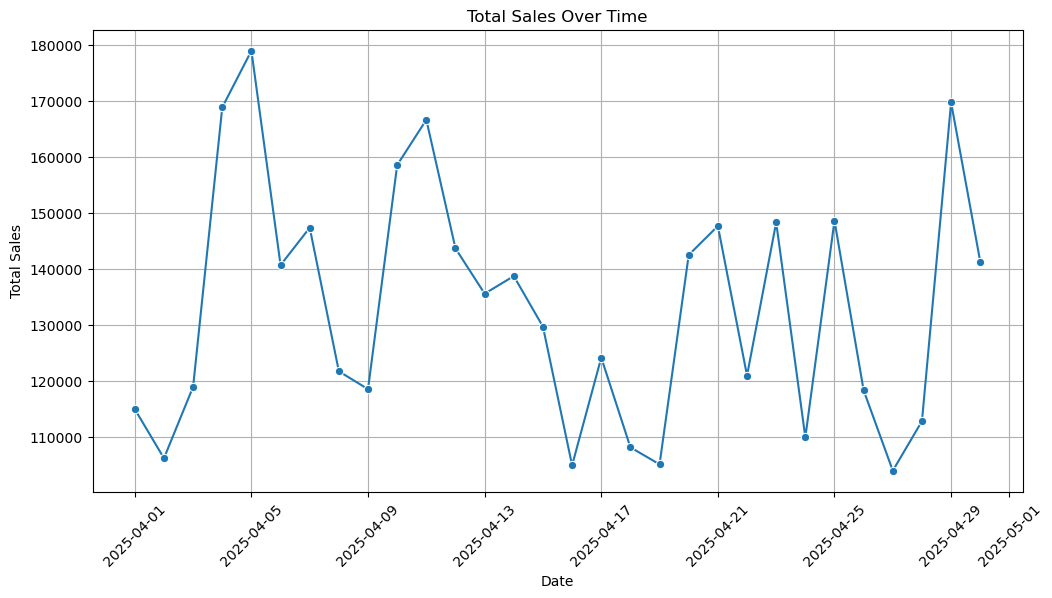

In [30]:
# Total Sales Over Time
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, x='Date', y='Total_Sales', marker='o')
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


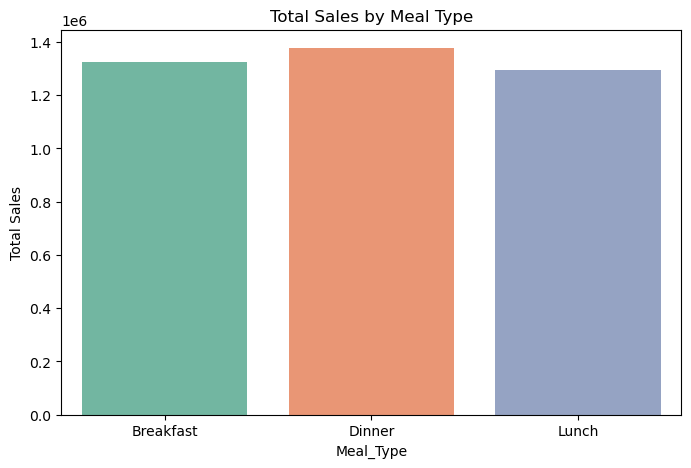

In [34]:
# Sales by Meal Type
meal_sales = df.groupby('Meal_Type')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=meal_sales, x='Meal_Type', y='Total_Sales',hue ='Meal_Type', palette='Set2')
plt.title('Total Sales by Meal Type')
plt.ylabel('Total Sales')
plt.show()


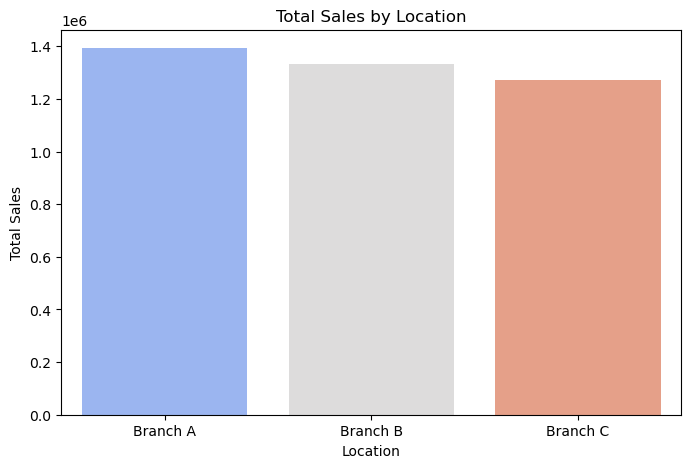

In [38]:
# Sales by Location
location_sales = df.groupby('Location')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=location_sales, x='Location', y='Total_Sales',hue='Location', palette='coolwarm')
plt.title('Total Sales by Location')
plt.ylabel('Total Sales')
plt.show()


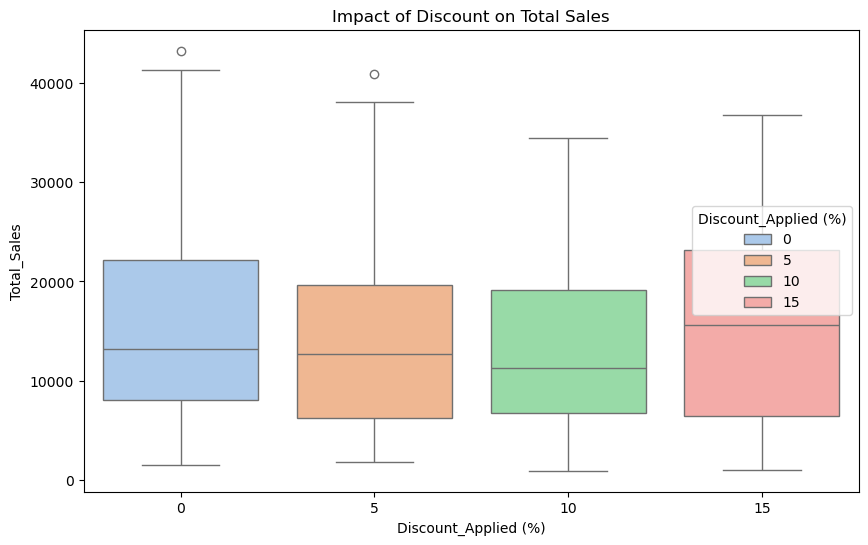

In [42]:
# Effect of Discounts on Sales
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Discount_Applied (%)', y='Total_Sales',hue='Discount_Applied (%)', palette='pastel')
plt.title('Impact of Discount on Total Sales')
plt.show()


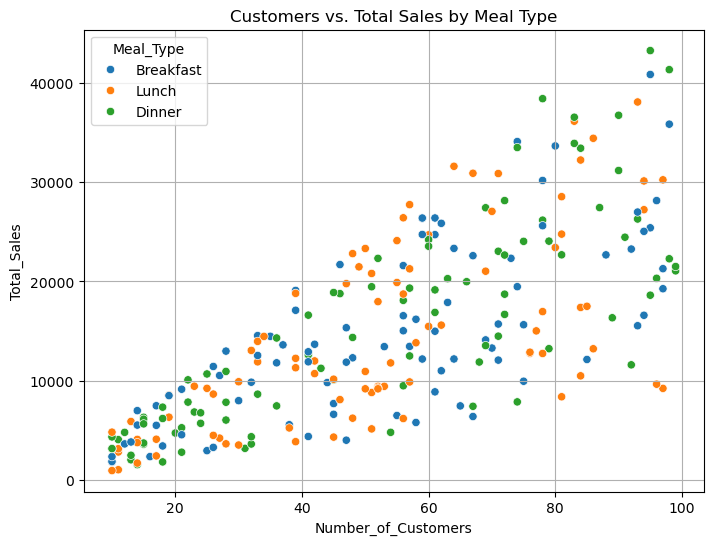

In [44]:
# Number of Customers vs. Total Sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Number_of_Customers', y='Total_Sales', hue='Meal_Type')
plt.title('Customers vs. Total Sales by Meal Type')
plt.grid(True)
plt.show()


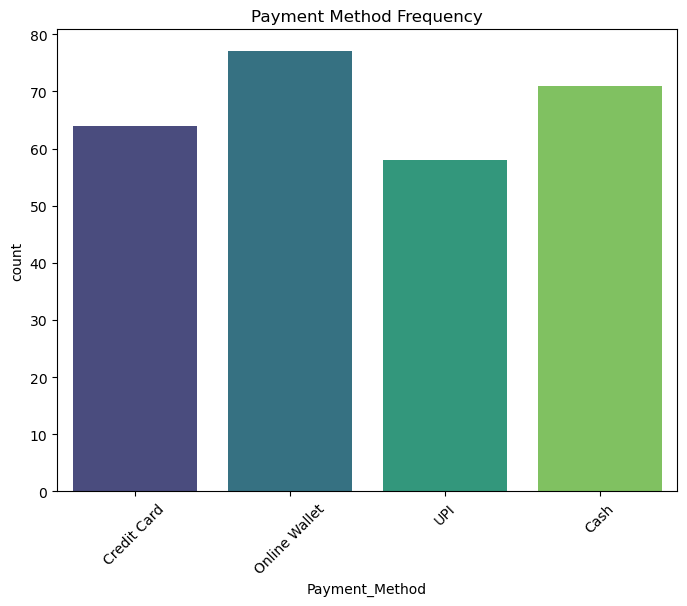

In [48]:
# Payment Method Preferences
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Payment_Method',hue='Payment_Method', palette='viridis')
plt.title('Payment Method Frequency')
plt.xticks(rotation=45)
plt.show()


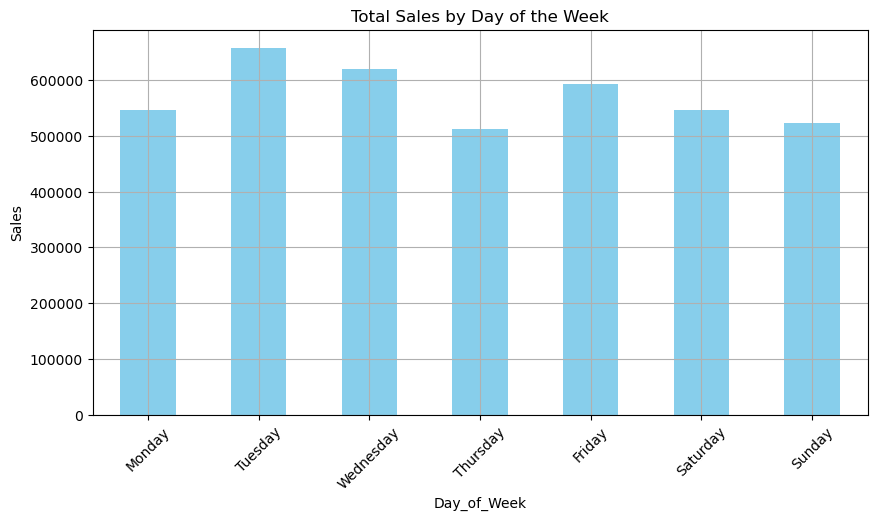

In [50]:
# Weekly Sales Trend
weekly_sales = df.groupby('Day_of_Week')['Total_Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,5))
weekly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Day of the Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [52]:
# 1. Import Libraries & Data
import pandas as pd
import numpy as np

# Assuming df is already generated
# df = pd.read_csv('restaurant_sales.csv')  # If loading from file


In [54]:
# 2. Handle Missing Values
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values if any
df.fillna({
    'Number_of_Customers': df['Number_of_Customers'].median(),
    'Average_Order_Value': df['Average_Order_Value'].mean()
}, inplace=True)


Date                    0
Day_of_Week             0
Location                0
Meal_Type               0
Number_of_Customers     0
Average_Order_Value     0
Discount_Applied (%)    0
Total_Sales             0
Payment_Method          0
dtype: int64


In [56]:
# 3. Convert Date and Extract Features
# Convert 'Date' to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful date features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6


In [58]:
#  4. Feature Engineering
# Revenue per customer
df['Revenue_per_Customer'] = df['Total_Sales'] / df['Number_of_Customers']

# Flag weekends
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [60]:
# 5. Encode Categorical Variables
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Location', 'Meal_Type', 'Payment_Method'], drop_first=True)


In [62]:
# 6. Define Features & Target Variable
# Drop irrelevant or redundant columns
df_encoded.drop(columns=['Date', 'Day_of_Week'], inplace=True)

# Define X (features) and y (target)
X = df_encoded.drop('Total_Sales', axis=1)
y = df_encoded['Total_Sales']


In [64]:
# 7. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [66]:
# Ready for Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 1182.9079006860275
R² Score: 0.981886608900436


In [68]:
# Step-by-Step Implementation (Prediction Modeling)
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [70]:
# 2. Preprocessing (Assuming 'df' is the existing DataFrame)
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Revenue_per_Customer'] = df['Total_Sales'] / df['Number_of_Customers']
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Location', 'Meal_Type', 'Payment_Method'], drop_first=True)
df_encoded.drop(['Date', 'Day_of_Week'], axis=1, inplace=True)


In [74]:
# 3. Split into features and target
X = df_encoded.drop('Total_Sales', axis=1)
y = df_encoded['Total_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Linear Regression")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


🔹 Linear Regression
R² Score: 0.8939455531504386
RMSE: 2862.3022492736827


In [86]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Regressor")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))



🔹 Random Forest Regressor
R² Score: 0.981886608900436
RMSE: 1182.9079006860275
